<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day07_Notes_Metrics_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example code from CS 167 on September 20, 2022


# Graphs! 
Let's take a look at how to plot data in a iPython Notebook:

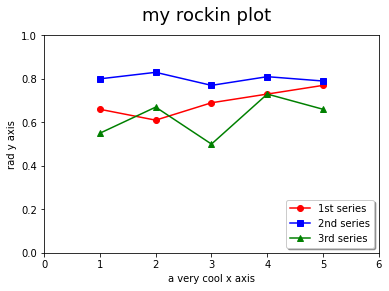

In [ ]:
import matplotlib.pyplot as plt

#lets start by making up some data
xvals = [1,2,3,4,5]
series1 = [.66,.61,.69,.73,.77]
series2 = [.8,.83,.77,.81,.79]
series3 = [.55,.67,.5,.73,.66]

#add names for the graph and axes
plt.suptitle('my rockin plot',fontsize=18)
plt.xlabel('a very cool x axis')
plt.ylabel('rad y axis')

#and plot our series
plt.plot(xvals,series1,'ro-',label='1st series')
plt.plot(xvals,series2,'bs-',label='2nd series')
plt.plot(xvals,series3,'g^-',label='3rd series')

# add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
plt.legend(loc='lower right', shadow=True)
plt.axis([0, 6, 0, 1]) ## 0 to 6 in x-dimension; 0 to 1 in y-dimension
plt.show()

In [ ]:
#Now, let's plot something about our data.
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

#load in the data
spotify_data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/spotify_top_charts.csv') #change this line to point to your data

#work with a subset of the data
subset = spotify_data[['artist_names','track_name','peak_rank']]
spotify_subset = subset.dropna(subset=['peak_rank'])
print(spotify_subset.shape)
spotify_subset.head()


(638, 3)


,artist_names,track_name,peak_rank
0,Glass Animals,Heat Waves,1.0
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1.0
2,Anitta,Envolver,3.0
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3.0
4,GAYLE,abcdefu,1.0


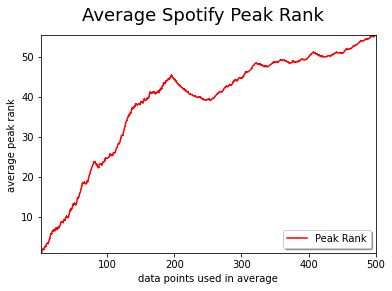

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# a silly function that returns the average peak_rank for the first k tracks in the dataframe
def getAveragePeakRank(data,k):
    return data["peak_rank"].iloc[0:k].mean()

number_of_points = 500

# populate the list
ranks_list = []
for i in range(1,number_of_points):
    val = getAveragePeakRank(spotify_subset,i)
    ranks_list.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Average Spotify Peak Rank',fontsize=18)
plt.xlabel('data points used in average')
plt.ylabel('average peak rank')
plt.plot(xvals,ranks_list,'r,-',label='Peak Rank')
plt.legend(loc='lower right', shadow=True)
ymin = min(ranks_list)
ymax = max(ranks_list)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

# Exercise #1
To do:
- Change the number of points to 50
- Change the range
- Change the titles
- Also plot the median (blue circles)


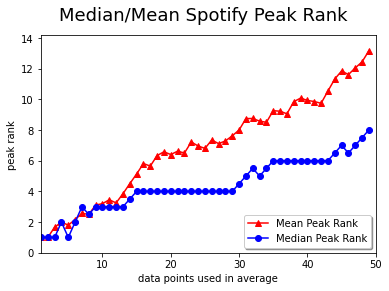

In [ ]:
# exercise #1:
def getMedianPeakRank(data,k):
    return data["peak_rank"].iloc[0:k].median()

number_of_points = 50

# populate the series list
mean_list = []
median_list = []
for i in range(1,number_of_points):
    val = getAveragePeakRank(spotify_subset,i)
    mean_list.append(val)
    val = getMedianPeakRank(spotify_subset,i)
    median_list.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Median/Mean Spotify Peak Rank',fontsize=18)
plt.xlabel('data points used in average')
plt.ylabel('peak rank')
plt.plot(xvals,mean_list,'r^-',label='Mean Peak Rank')
plt.plot(xvals,median_list,'bo-',label='Median Peak Rank')
plt.legend(loc='lower right', shadow=True)
ymin = min(mean_list)
ymax = max(mean_list)
plt.axis([1, number_of_points, ymin-1, ymax+1])
plt.show()

